In [ ]:
# Завантаження потрібних бібліотек
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
# Імпорт відповідних бібліотек
import os
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import Image as IPyImage

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# === 1. Налаштування ===
# Параметри
HOME = os.getcwd() # Домашня директорія
API_KEY = "US6GFXKmmIauPoD8GLi5" # API-ключ
WORKSPACE_NAME = "dekkan-neural-network-workspace" # Назва робочої області (Dekkan neural network workspace)
PROJECT_NAME = "cats_detection-yjccj" # Ім'я проєкту (Cats_detection)
DATASET_VERSION = 1 # Версія датасету
DATA_FORMAT = "yolov11" # Формат даних датасету
MODEL_PATH = f"{HOME}/models/yolo11m.pt" # Шлях до завантаженої моделі
TRAIN_EPOCHS = 50 # Кількість епох
IMG_SIZE = 640 # Розмір зображень

In [ ]:
# === 2. Завантаження датасету ===
def download_dataset():
    print("Завантаження датасету...")
    rf = Roboflow(api_key=API_KEY)
    project = rf.workspace(WORKSPACE_NAME).project(PROJECT_NAME)
    version = project.version(DATASET_VERSION)
    dataset = version.download(DATA_FORMAT)
    print(f"Датасет завантажено до: {dataset.location}")
    return dataset

In [ ]:
# === 3. Тренування моделі ===
def train_model(dataset):
    print("Тренування моделі...")
    model = YOLO(MODEL_PATH)  # Завантаження предтренованої моделі

    print("Пристрій, що використовується:", model.device)
    model.train(
        data = f"{dataset.location}/data.yaml",
        epochs = TRAIN_EPOCHS,
        imgsz = IMG_SIZE,
        plots = True,
        save = True,
        project = 'runs/detect',  # Стандартний шлях
        name = 'train_result',  # Ім'я підкаталогу
        batch = 16,
    )
    print("Тренування завершено.")
    return model

In [ ]:
# === 4. Основний блок ===
if __name__ == "__main__":
    # Завантаження датасету
    dataset = download_dataset()

    # Тренування моделі
    model = train_model(dataset)

    # Отримання шляху до останньої тренувальної сесії
    runs_path = "runs/detect"
    latest_run = max([os.path.join(runs_path, d) for d in os.listdir(runs_path)], key=os.path.getmtime)
    print(f"Останній запуск збережено в: {latest_run}")

    print("Все завершено успішно.")

Завантаження датасету...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cats_detection-1 in yolov11:: 100%|██████████| 33458/33458 [00:04<00:00, 7097.14it/s]


Датасет завантажено до: /content/Cats_detection-1
Тренування моделі...


100%|██████████| 38.8M/38.8M [00:00<00:00, 234MB/s]


Пристрій, що використовується: cpu
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/models/yolo11m.pt, data=/content/Cats_detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/detect, name=train_result, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_tx

100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]


Overriding model.yaml nc=80 with nc=24

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 65.3MB/s]


AMP: checks passed ✅


train: Scanning /content/Cats_detection-1/train/labels... 14634 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14634/14634 [00:09<00:00, 1480.06it/s]


train: New cache created: /content/Cats_detection-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Cats_detection-1/valid/labels... 1393 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1393/1393 [00:01<00:00, 1197.48it/s]

val: New cache created: /content/Cats_detection-1/valid/labels.cache


Plotting labels to runs/detect/train_result/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train_result
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.72G     0.6728      2.482      1.359         31        640: 100%|██████████| 915/915 [02:25<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:08<00:00,  5.16it/s]


                   all       1393       1440      0.453      0.577       0.52      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.65G     0.6827      1.865      1.343         29        640: 100%|██████████| 915/915 [02:17<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.28it/s]

                   all       1393       1440      0.495      0.548      0.527      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.64G     0.7766      1.955      1.406         33        640: 100%|██████████| 915/915 [02:13<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.25it/s]

                   all       1393       1440      0.311      0.475      0.333      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.62G     0.8081      1.999      1.427         32        640: 100%|██████████| 915/915 [02:12<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.22it/s]

                   all       1393       1440      0.404      0.548      0.466      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.65G     0.7568      1.877      1.384         30        640: 100%|██████████| 915/915 [02:12<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.29it/s]

                   all       1393       1440      0.531      0.523      0.508       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.68G     0.7127      1.774      1.349         30        640: 100%|██████████| 915/915 [02:11<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.29it/s]

                   all       1393       1440      0.529        0.6      0.598      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.66G     0.6794      1.689      1.322         29        640: 100%|██████████| 915/915 [02:12<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.35it/s]

                   all       1393       1440      0.496      0.633      0.599      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.62G     0.6621      1.627      1.309         32        640: 100%|██████████| 915/915 [02:12<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.30it/s]

                   all       1393       1440      0.609      0.717      0.734      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.65G      0.636      1.561      1.288         32        640: 100%|██████████| 915/915 [02:12<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.32it/s]

                   all       1393       1440      0.664      0.708      0.746      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       8.6G     0.6222       1.51      1.277         22        640: 100%|██████████| 915/915 [02:12<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.26it/s]

                   all       1393       1440      0.683      0.741      0.768      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.64G     0.6081      1.476      1.269         30        640: 100%|██████████| 915/915 [02:12<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.30it/s]

                   all       1393       1440      0.728      0.732        0.8      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.62G      0.593      1.429      1.259         29        640: 100%|██████████| 915/915 [02:12<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.26it/s]

                   all       1393       1440       0.74      0.732      0.803      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.64G     0.5757      1.394      1.241         31        640: 100%|██████████| 915/915 [02:12<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.35it/s]

                   all       1393       1440      0.772      0.734      0.824      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.68G     0.5749       1.36      1.242         28        640: 100%|██████████| 915/915 [02:12<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.28it/s]

                   all       1393       1440      0.769      0.749      0.826      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.65G      0.565      1.332      1.235         31        640: 100%|██████████| 915/915 [02:12<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.32it/s]

                   all       1393       1440      0.799      0.782      0.857      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.62G     0.5492      1.309      1.222         28        640: 100%|██████████| 915/915 [02:12<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.28it/s]

                   all       1393       1440      0.803      0.797      0.858      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.65G     0.5461      1.284      1.222         27        640: 100%|██████████| 915/915 [02:11<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.30it/s]

                   all       1393       1440      0.838      0.796      0.884      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.62G     0.5409      1.243      1.215         24        640: 100%|██████████| 915/915 [02:12<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.36it/s]

                   all       1393       1440      0.795      0.813      0.872       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.65G      0.534      1.223      1.211         28        640: 100%|██████████| 915/915 [02:12<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.38it/s]

                   all       1393       1440      0.821      0.798       0.88      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.62G     0.5223      1.198        1.2         28        640: 100%|██████████| 915/915 [02:12<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.27it/s]

                   all       1393       1440      0.816       0.82      0.894      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.66G     0.5194      1.166      1.198         34        640: 100%|██████████| 915/915 [02:12<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.35it/s]

                   all       1393       1440      0.843       0.82      0.898      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.62G     0.5143      1.158      1.197         24        640: 100%|██████████| 915/915 [02:12<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.35it/s]

                   all       1393       1440      0.833      0.841      0.903      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.64G      0.511      1.142      1.195         33        640: 100%|██████████| 915/915 [02:12<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.38it/s]

                   all       1393       1440      0.847      0.839      0.902      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.63G     0.4958      1.113      1.184         29        640: 100%|██████████| 915/915 [02:12<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.38it/s]

                   all       1393       1440      0.845      0.826        0.9      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.65G     0.4969      1.092      1.181         29        640: 100%|██████████| 915/915 [02:12<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.37it/s]

                   all       1393       1440      0.883      0.829      0.914      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.68G     0.4893       1.08      1.175         32        640: 100%|██████████| 915/915 [02:12<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.39it/s]

                   all       1393       1440      0.868      0.854       0.92      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.65G     0.4844      1.056      1.177         28        640: 100%|██████████| 915/915 [02:12<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.40it/s]

                   all       1393       1440      0.883      0.869       0.93      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.62G     0.4785       1.03      1.167         27        640: 100%|██████████| 915/915 [02:12<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.39it/s]

                   all       1393       1440        0.9      0.838      0.925      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.65G      0.474      1.021      1.167         29        640: 100%|██████████| 915/915 [02:12<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.42it/s]

                   all       1393       1440      0.872      0.849      0.922      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       8.6G     0.4632          1      1.159         27        640: 100%|██████████| 915/915 [02:12<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.42it/s]

                   all       1393       1440      0.878      0.856      0.927       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.65G     0.4639     0.9818      1.161         31        640: 100%|██████████| 915/915 [02:12<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.38it/s]

                   all       1393       1440      0.872      0.858      0.926      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.63G     0.4598     0.9688      1.158         33        640: 100%|██████████| 915/915 [02:12<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.41it/s]

                   all       1393       1440      0.904      0.852      0.931       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.67G     0.4536     0.9507      1.151         30        640: 100%|██████████| 915/915 [02:12<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.43it/s]

                   all       1393       1440       0.87      0.885      0.936      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       8.6G     0.4468     0.9346      1.147         28        640: 100%|██████████| 915/915 [02:12<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.38it/s]

                   all       1393       1440      0.898      0.862      0.935      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.66G     0.4467     0.9151      1.144         34        640: 100%|██████████| 915/915 [02:12<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.41it/s]

                   all       1393       1440      0.893       0.87      0.936      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.62G     0.4426     0.8982      1.143         24        640: 100%|██████████| 915/915 [02:12<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.42it/s]

                   all       1393       1440      0.872      0.894      0.939      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.66G     0.4328     0.8888      1.139         25        640: 100%|██████████| 915/915 [02:12<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.37it/s]

                   all       1393       1440      0.895       0.88      0.939      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       8.6G     0.4291     0.8701      1.132         29        640: 100%|██████████| 915/915 [02:11<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.34it/s]

                   all       1393       1440      0.907      0.877      0.941      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.65G     0.4247     0.8575       1.13         32        640: 100%|██████████| 915/915 [02:12<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.37it/s]

                   all       1393       1440      0.908      0.869      0.938       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.63G     0.4241      0.844      1.129         29        640: 100%|██████████| 915/915 [02:12<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.35it/s]

                   all       1393       1440      0.896      0.884      0.938      0.871


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.64G     0.3039     0.3555      1.112         10        640: 100%|██████████| 915/915 [02:12<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.35it/s]

                   all       1393       1440      0.886      0.877      0.935      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.59G      0.293     0.3242        1.1         11        640: 100%|██████████| 915/915 [02:12<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.34it/s]

                   all       1393       1440        0.9      0.869      0.934      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.63G     0.2801     0.2985      1.086         10        640: 100%|██████████| 915/915 [02:12<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.36it/s]

                   all       1393       1440      0.864      0.893      0.936      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.61G      0.272     0.2754      1.076         10        640: 100%|██████████| 915/915 [02:12<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.33it/s]

                   all       1393       1440      0.889      0.877      0.937      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.63G     0.2641     0.2636      1.067         10        640: 100%|██████████| 915/915 [02:12<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.35it/s]

                   all       1393       1440      0.901      0.856      0.934       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.67G      0.255      0.246      1.059         10        640: 100%|██████████| 915/915 [02:12<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.34it/s]

                   all       1393       1440      0.906      0.861      0.935       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.63G     0.2478     0.2247      1.048         10        640: 100%|██████████| 915/915 [02:12<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.36it/s]

                   all       1393       1440      0.912      0.856      0.936      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.61G     0.2411     0.2173      1.046         11        640: 100%|██████████| 915/915 [02:12<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.41it/s]

                   all       1393       1440      0.888      0.882      0.936      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.64G     0.2347     0.2038      1.039         10        640: 100%|██████████| 915/915 [02:12<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.40it/s]

                   all       1393       1440      0.887      0.876      0.935      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.67G     0.2292     0.1968      1.036         11        640: 100%|██████████| 915/915 [02:12<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.36it/s]

                   all       1393       1440      0.882      0.881      0.934      0.882



50 epochs completed in 1.958 hours.
Optimizer stripped from runs/detect/train_result/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train_result/weights/best.pt, 40.5MB

Validating runs/detect/train_result/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11m summary (fused): 303 layers, 20,048,536 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.64it/s]


                   all       1393       1440      0.885      0.884      0.936      0.883
            Abyssinian         55         55      0.829      0.964      0.963       0.91
      American Bobtail         64         65       0.79       0.81      0.859      0.839
         American Curl         44         47      0.948      0.894      0.955      0.921
                Bengal         69         70      0.737      0.801      0.866       0.77
                Birman         70         70      0.773       0.78      0.861      0.798
                Bombay         66         66      0.951      0.985      0.978      0.936
     British Shorthair         54         54      0.897      0.907      0.947      0.921
           Cornish Rex         60         61      0.933      0.909      0.975      0.929
          Egyptian Mau         51         51      0.777      0.819      0.881      0.836
            Khao Manee         42         49       0.88      0.918      0.965      0.895
                 Lyko

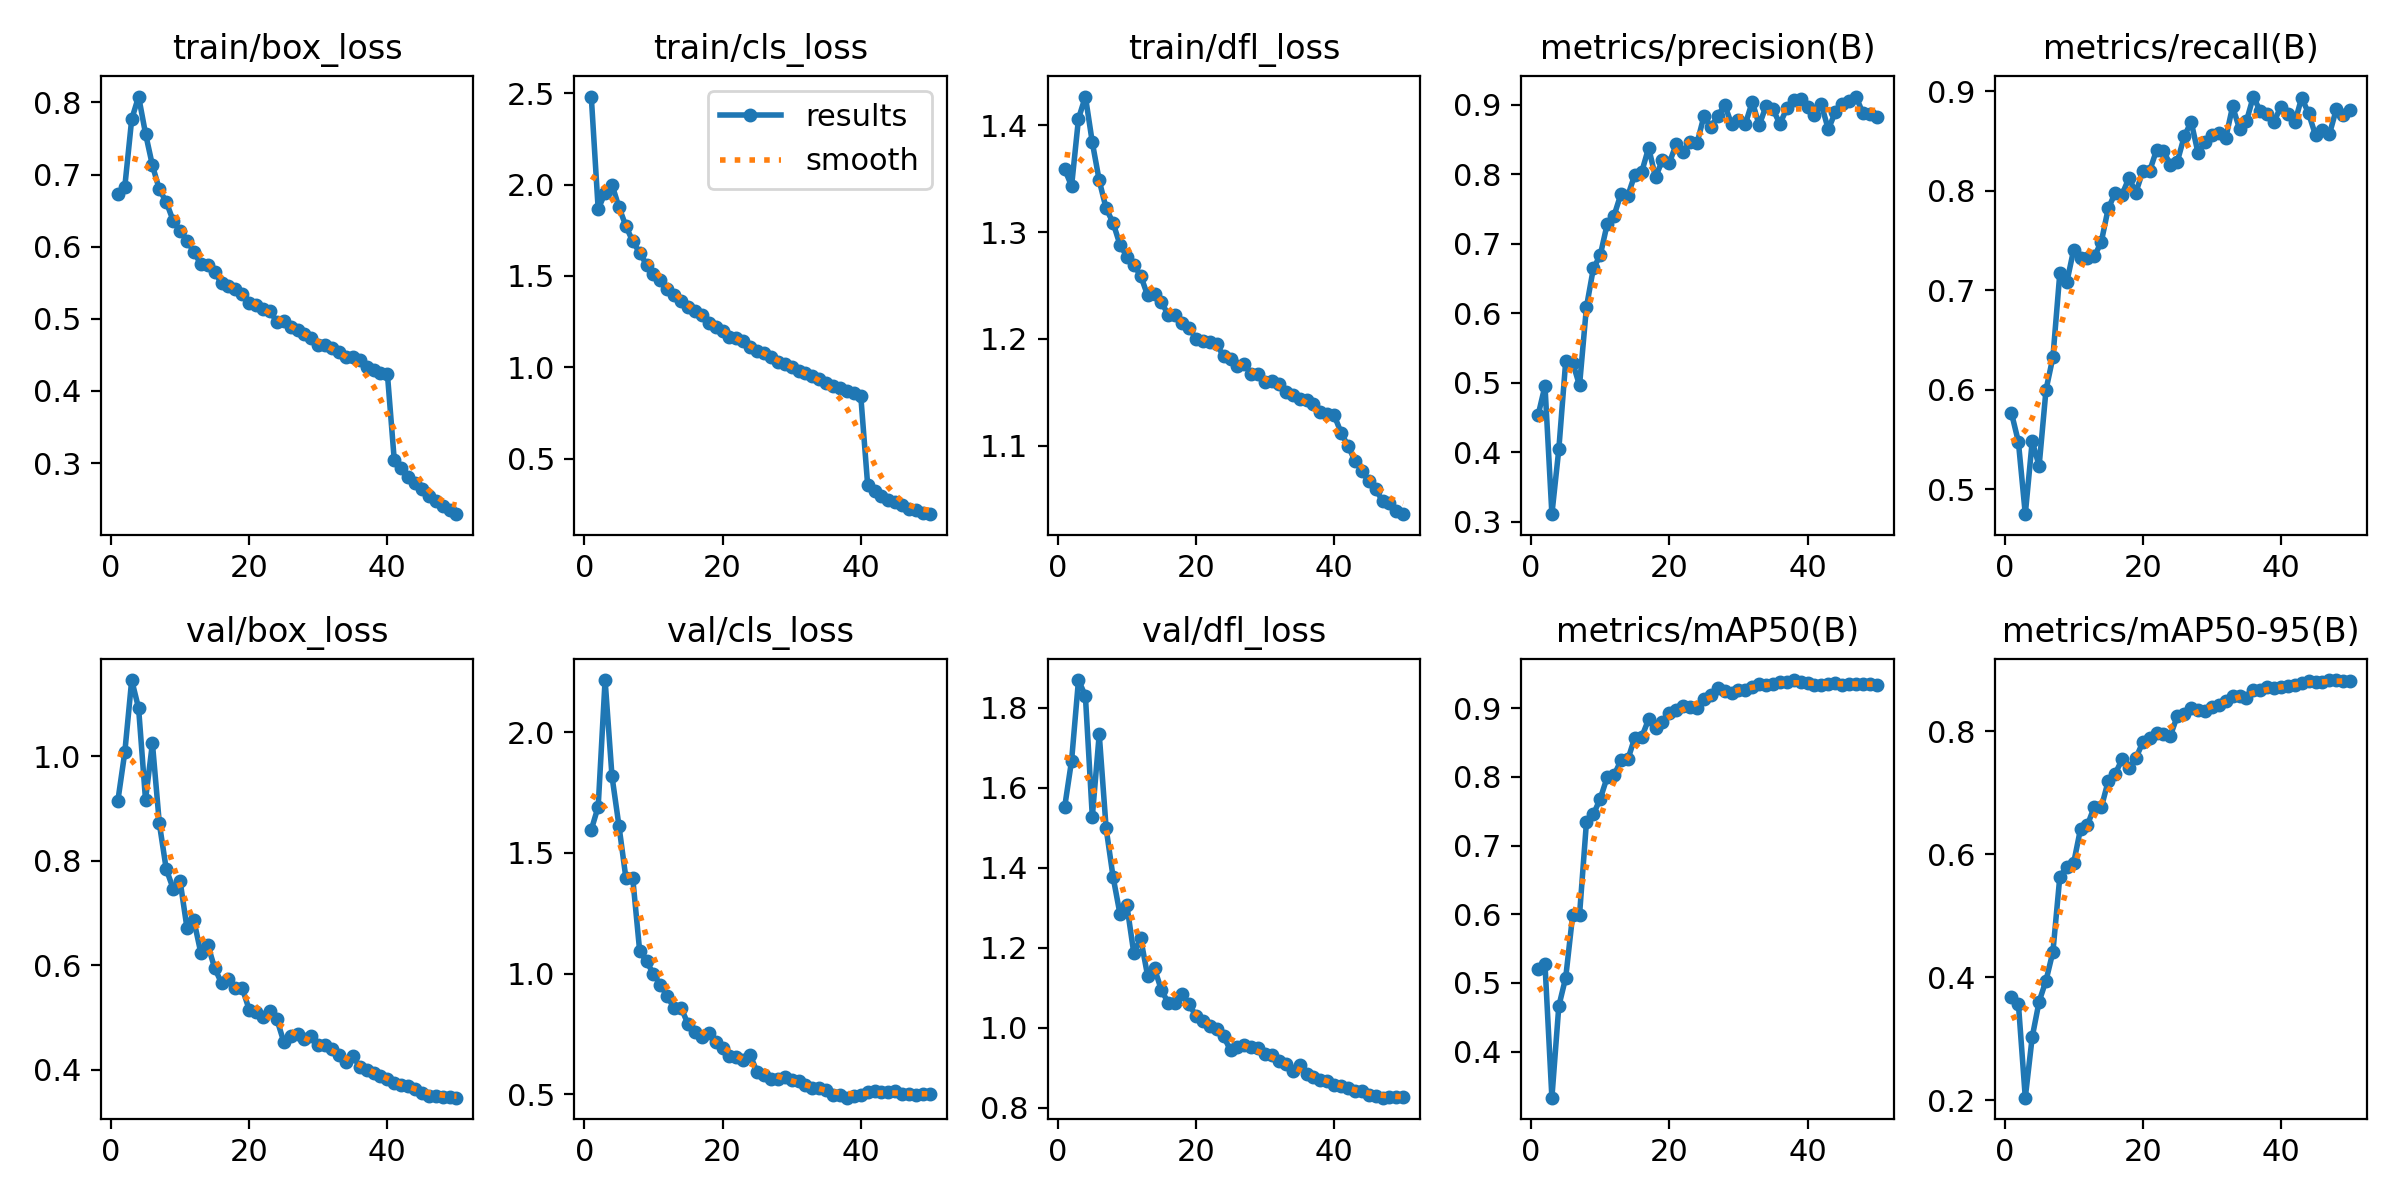

In [ ]:
# === 5. Отримання результатів навчання у вигляді графіків ===

# Загальні результати навчання
IPyImage (filename = f'/content/runs/detect/train_result/results.png', width =600)

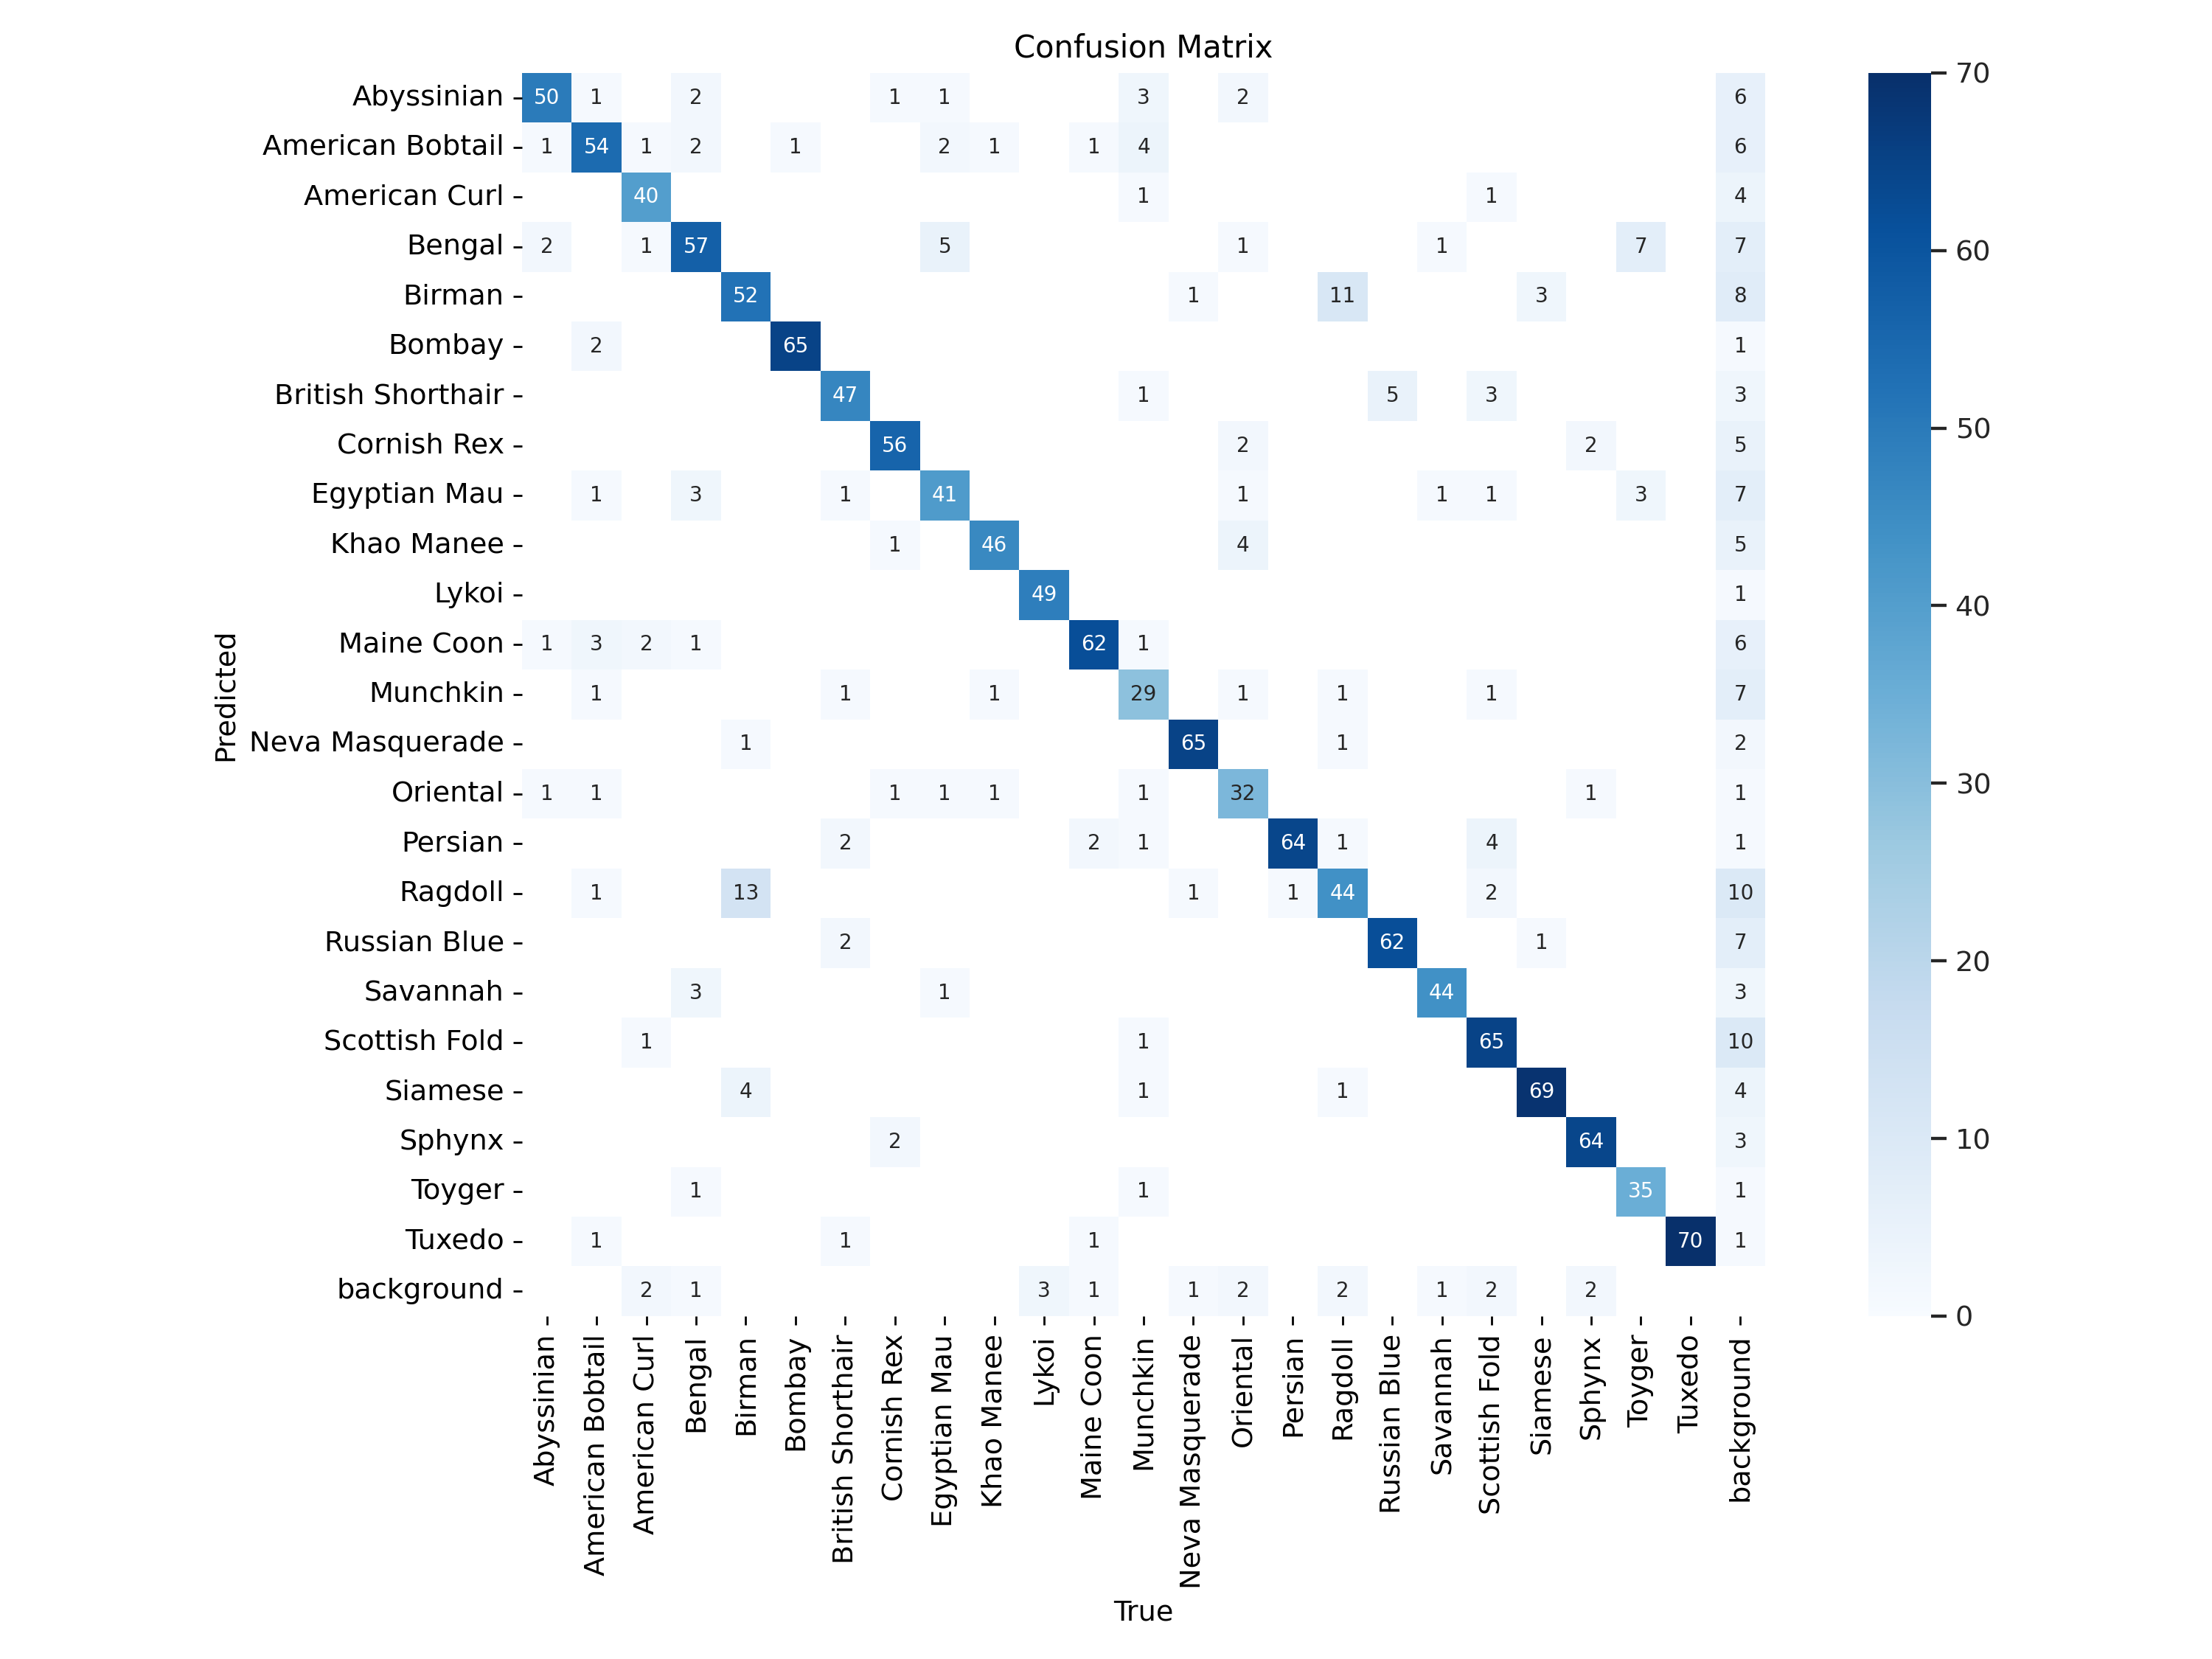

In [ ]:
# Матриця заплутаності (Confusion Matrix)
IPyImage (filename = f'/content/runs/detect/train_result/confusion_matrix.png', width =600)

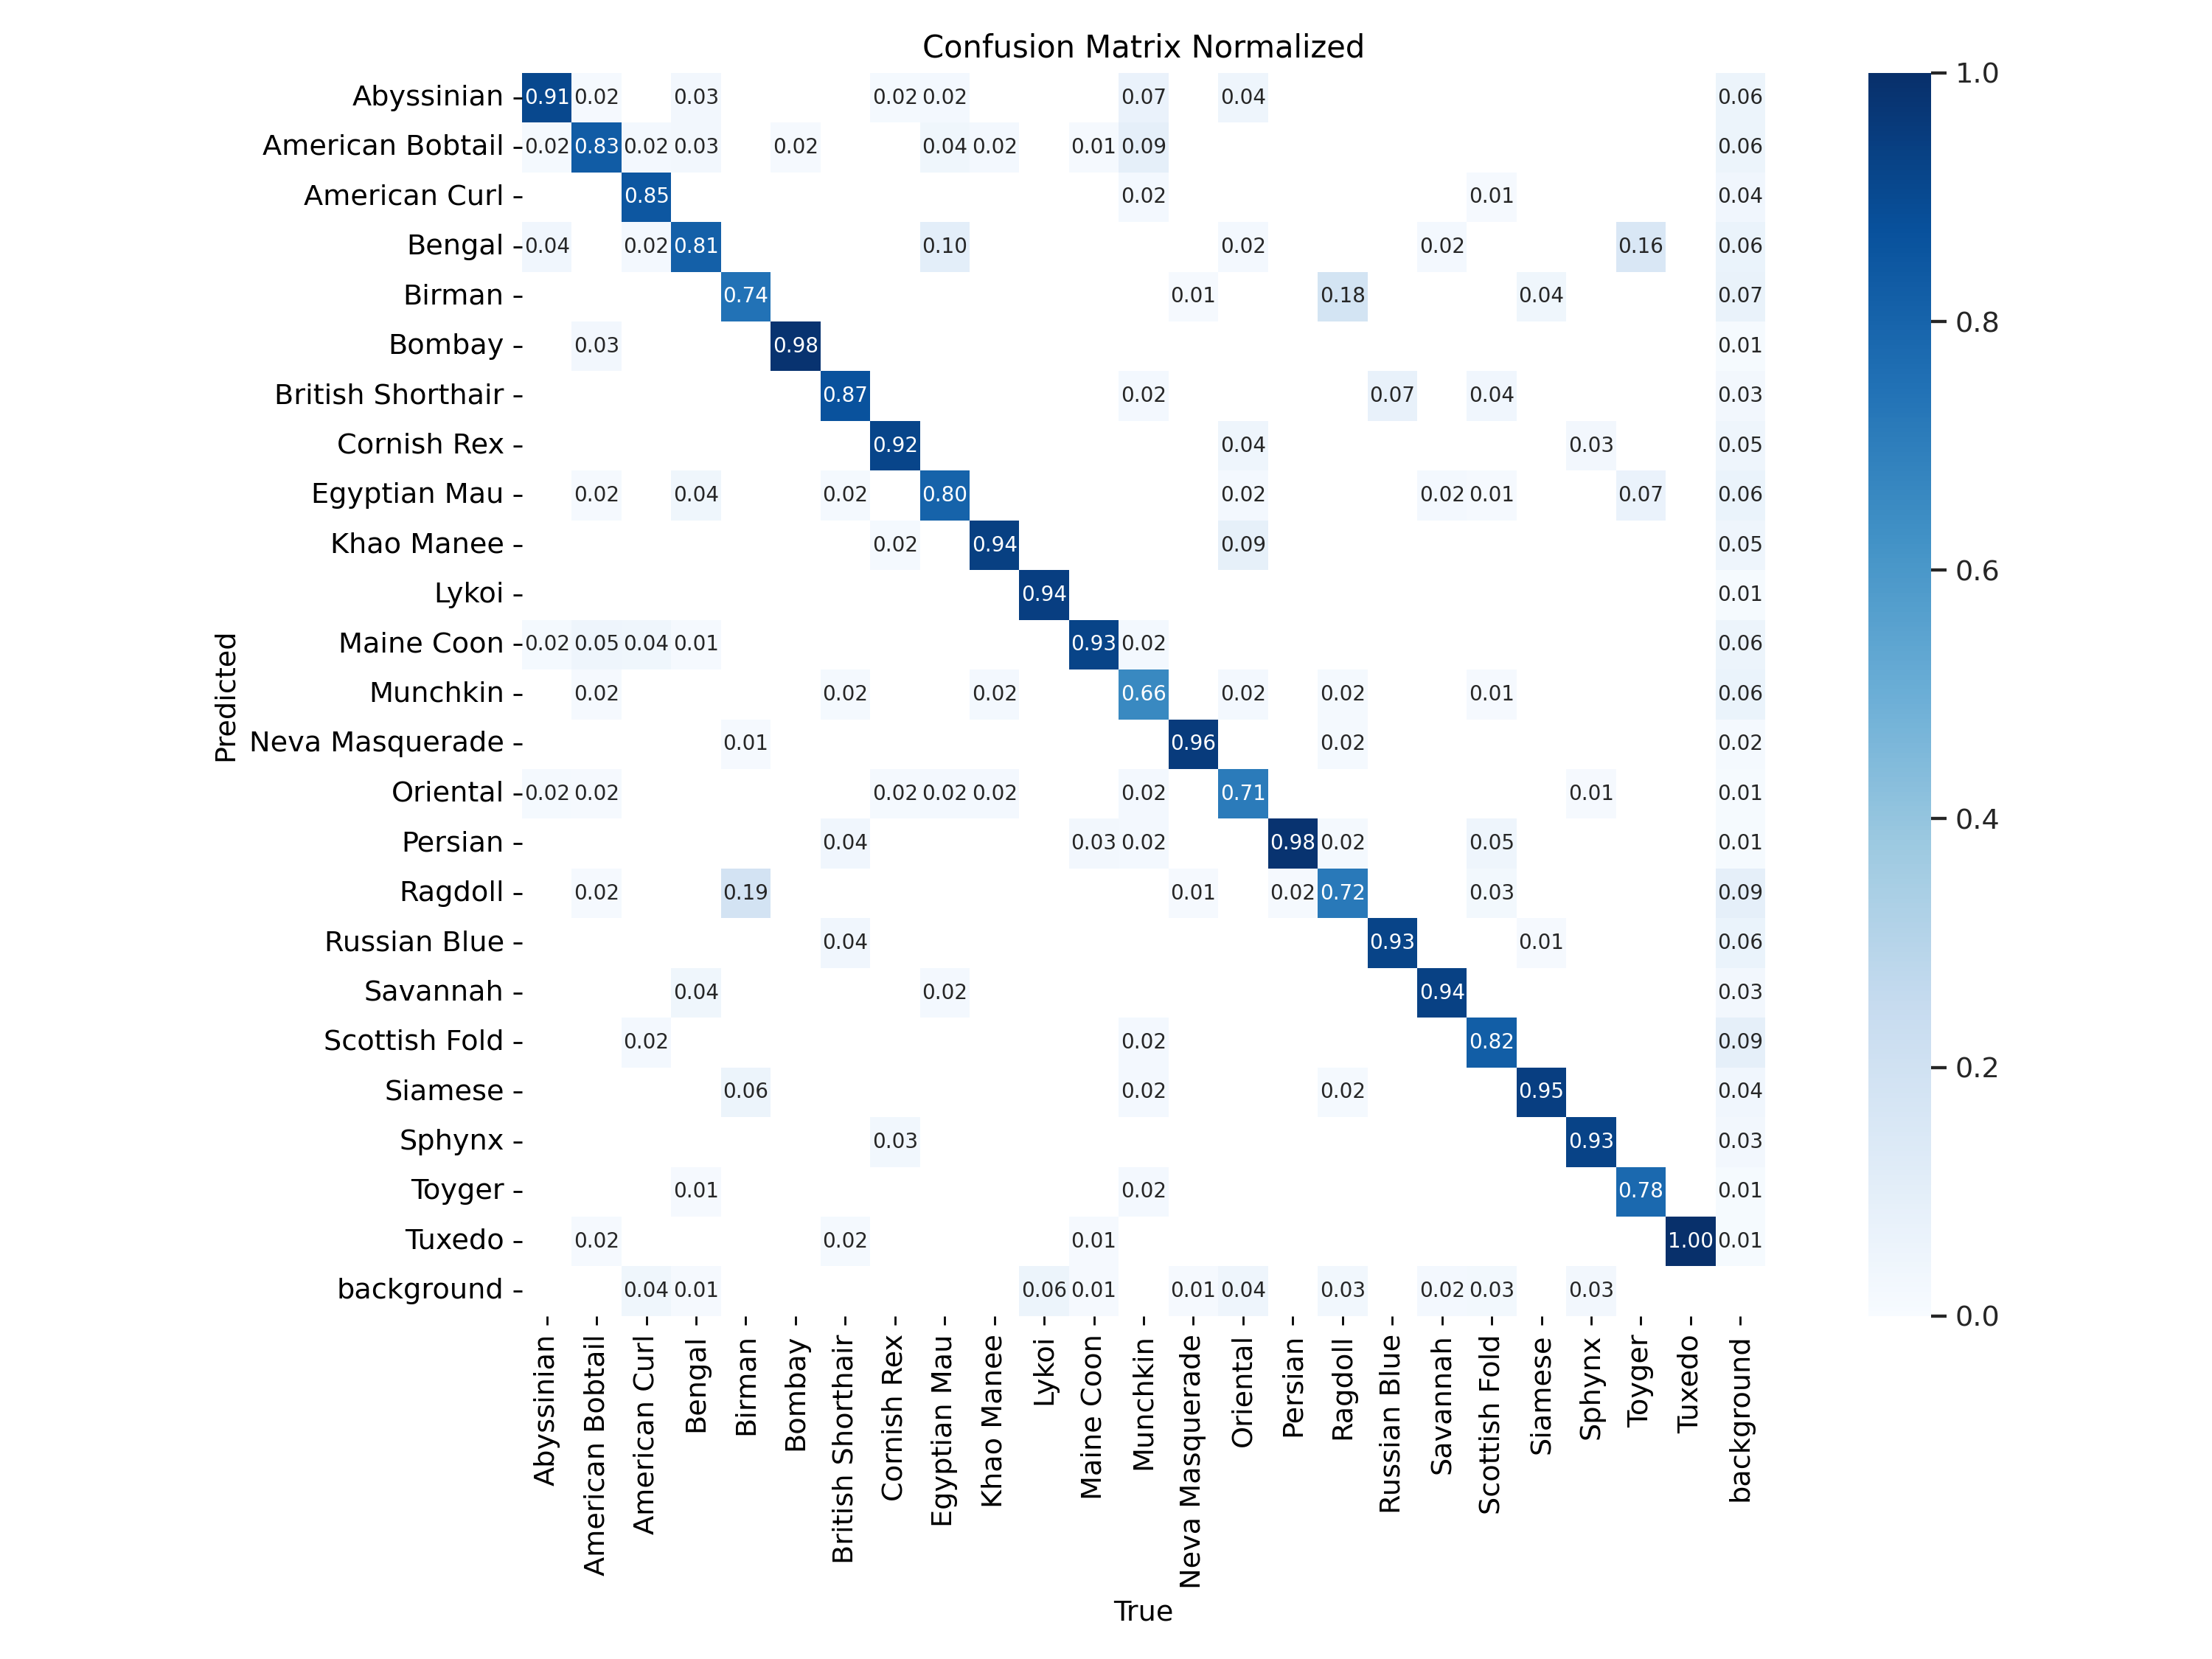

In [ ]:
# Нормалізована матриця заплутаності (Confusion Matrix Normalized)
IPyImage (filename = f'/content/runs/detect/train_result/confusion_matrix_normalized.png', width =600)

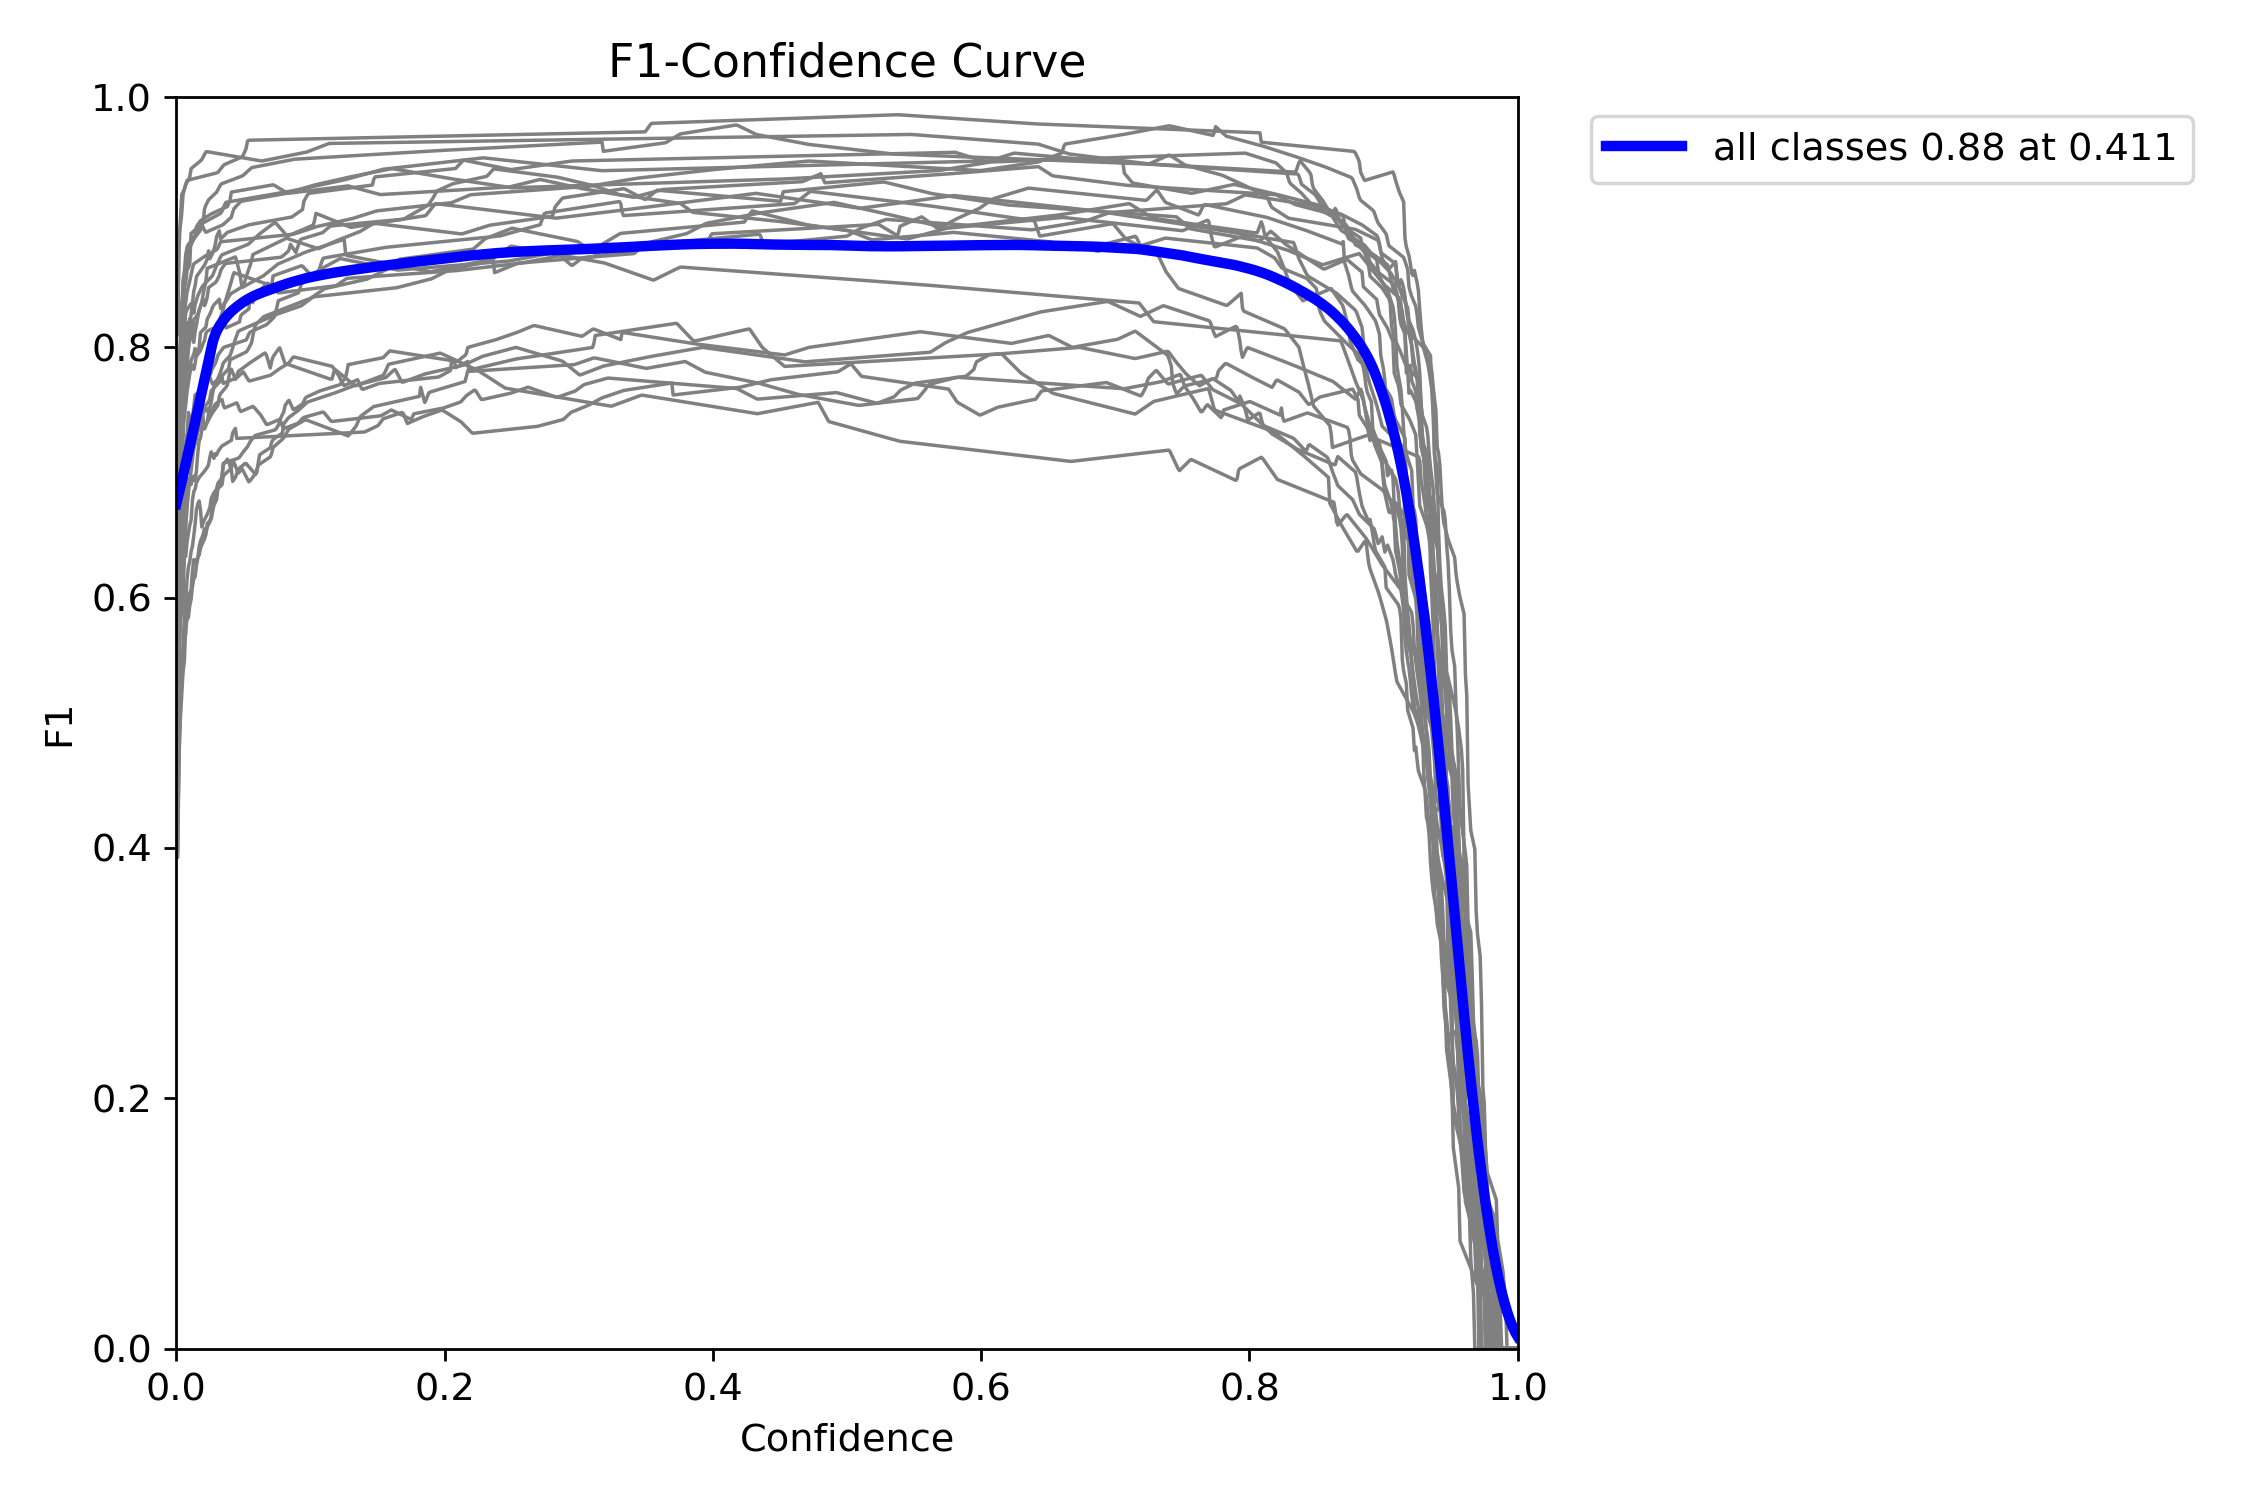

In [ ]:
# Графік залежності F1-score від рівня впевненості (F1-Confidence Curve)
IPyImage (filename = f'/content/runs/detect/train_result/F1_curve.png', width =600)

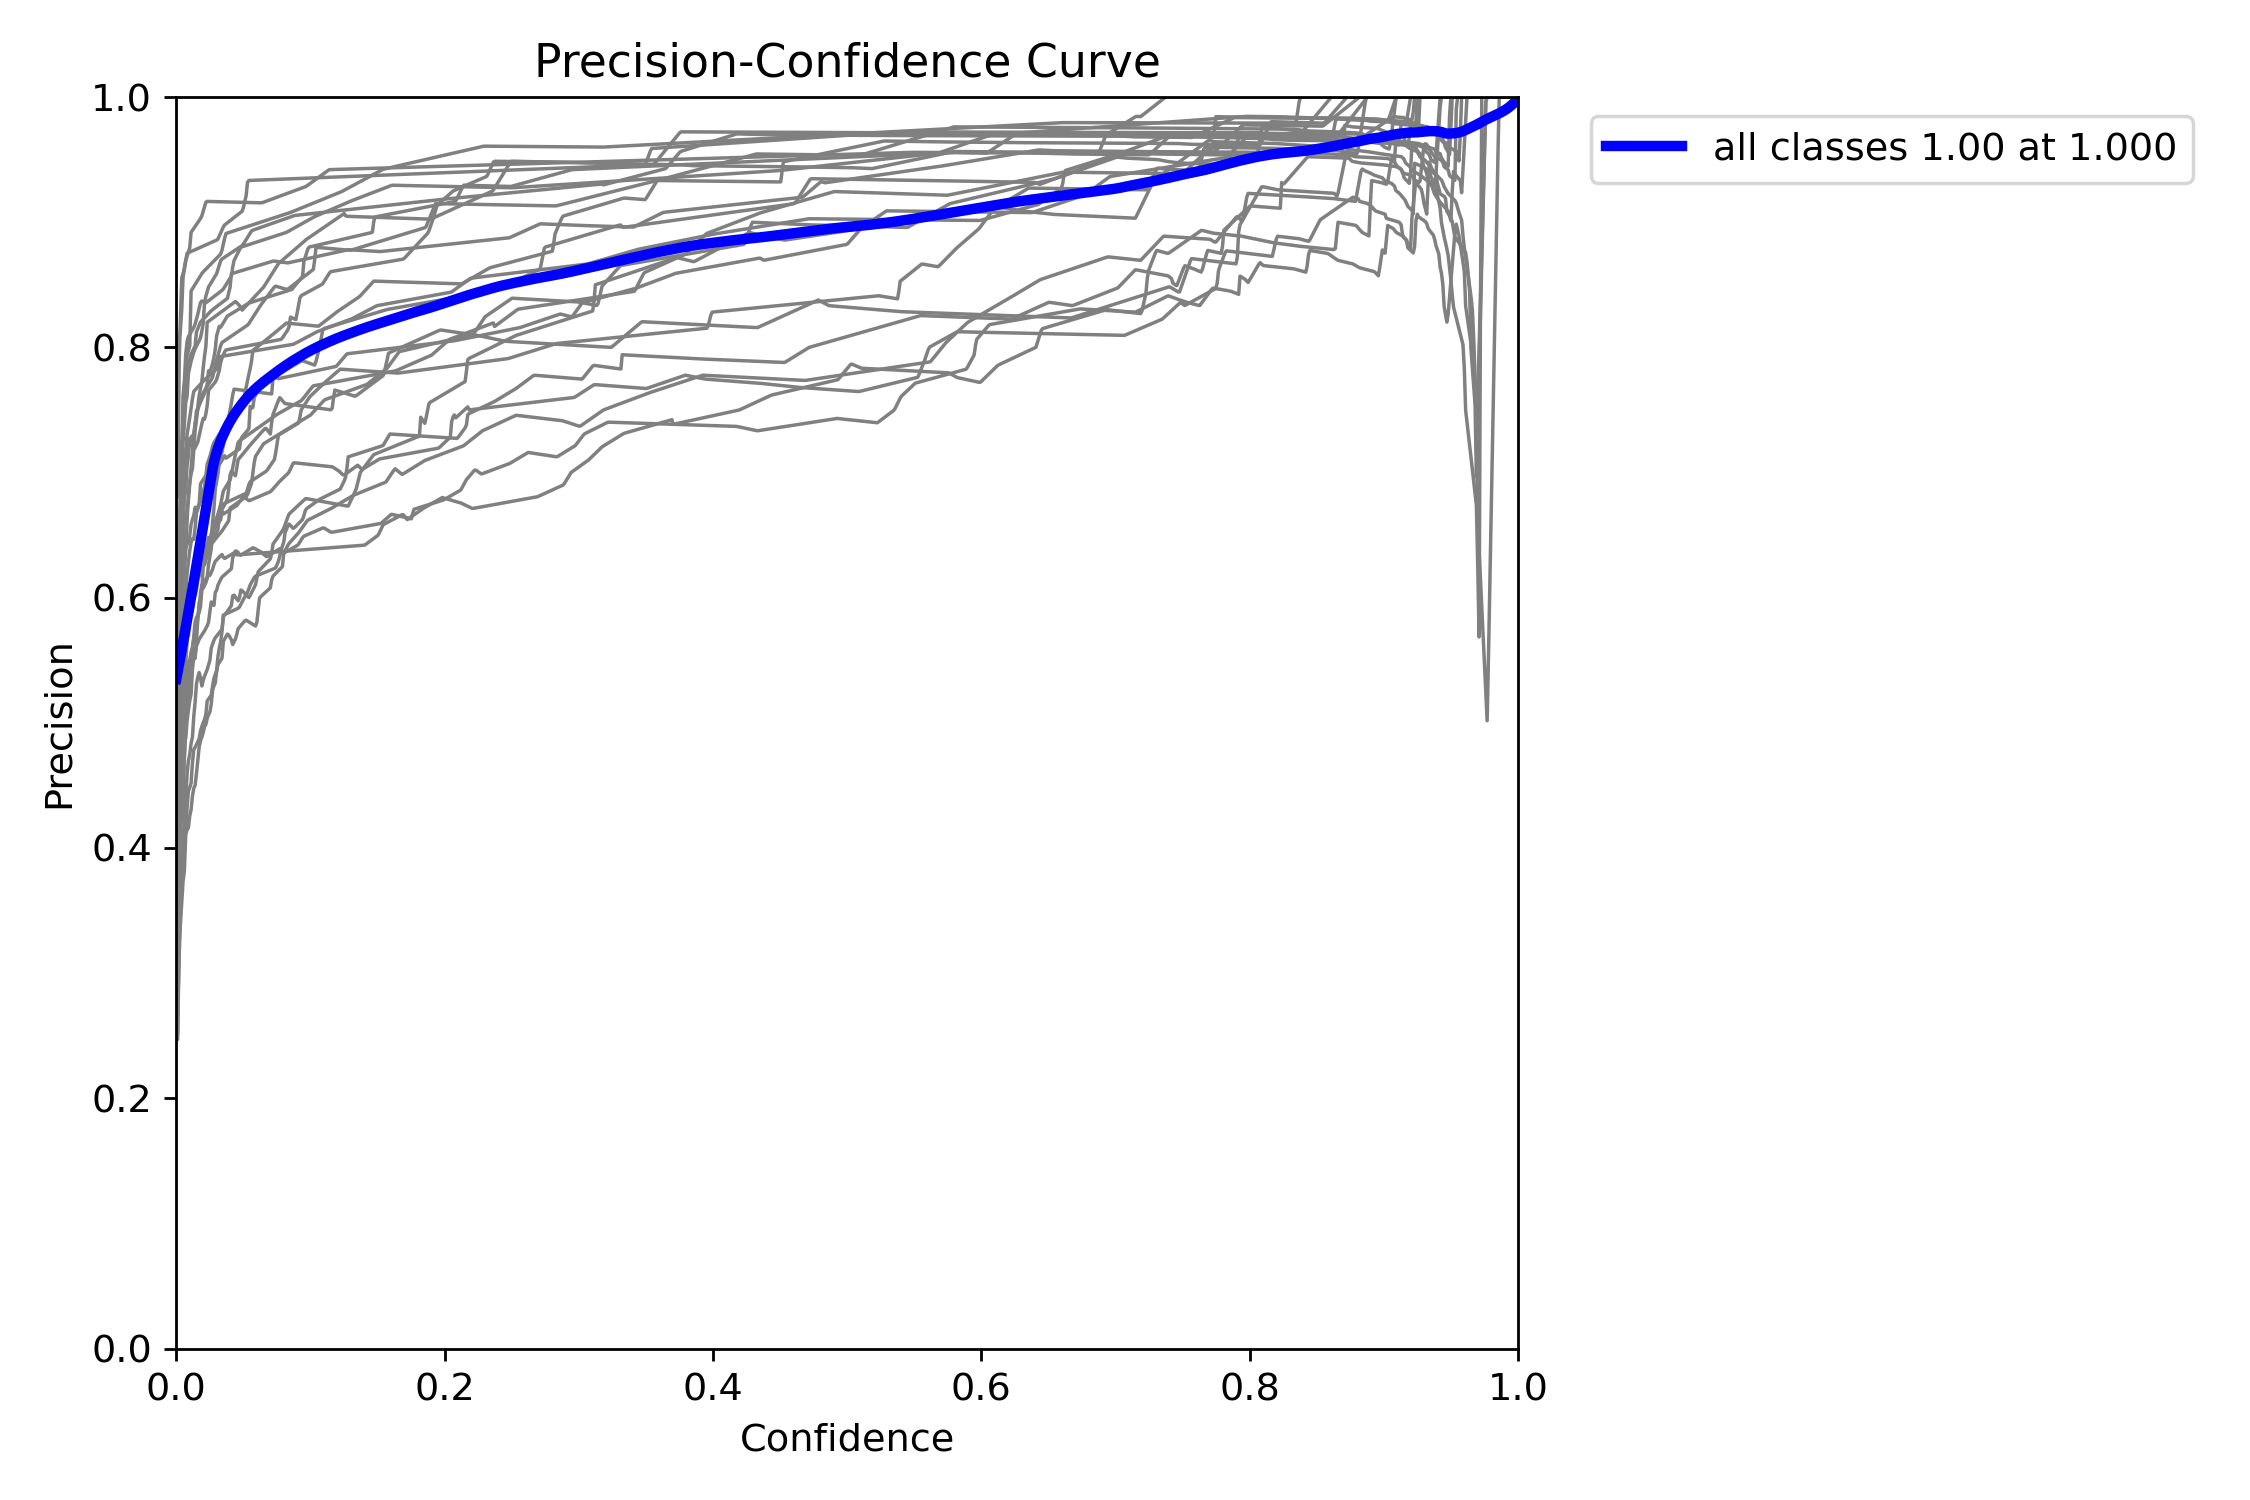

In [ ]:
# Графік залежності точності від впевненості *(Orecision-Confidence Curve)
IPyImage (filename = f'/content/runs/detect/train_result/P_curve.png', width =600)

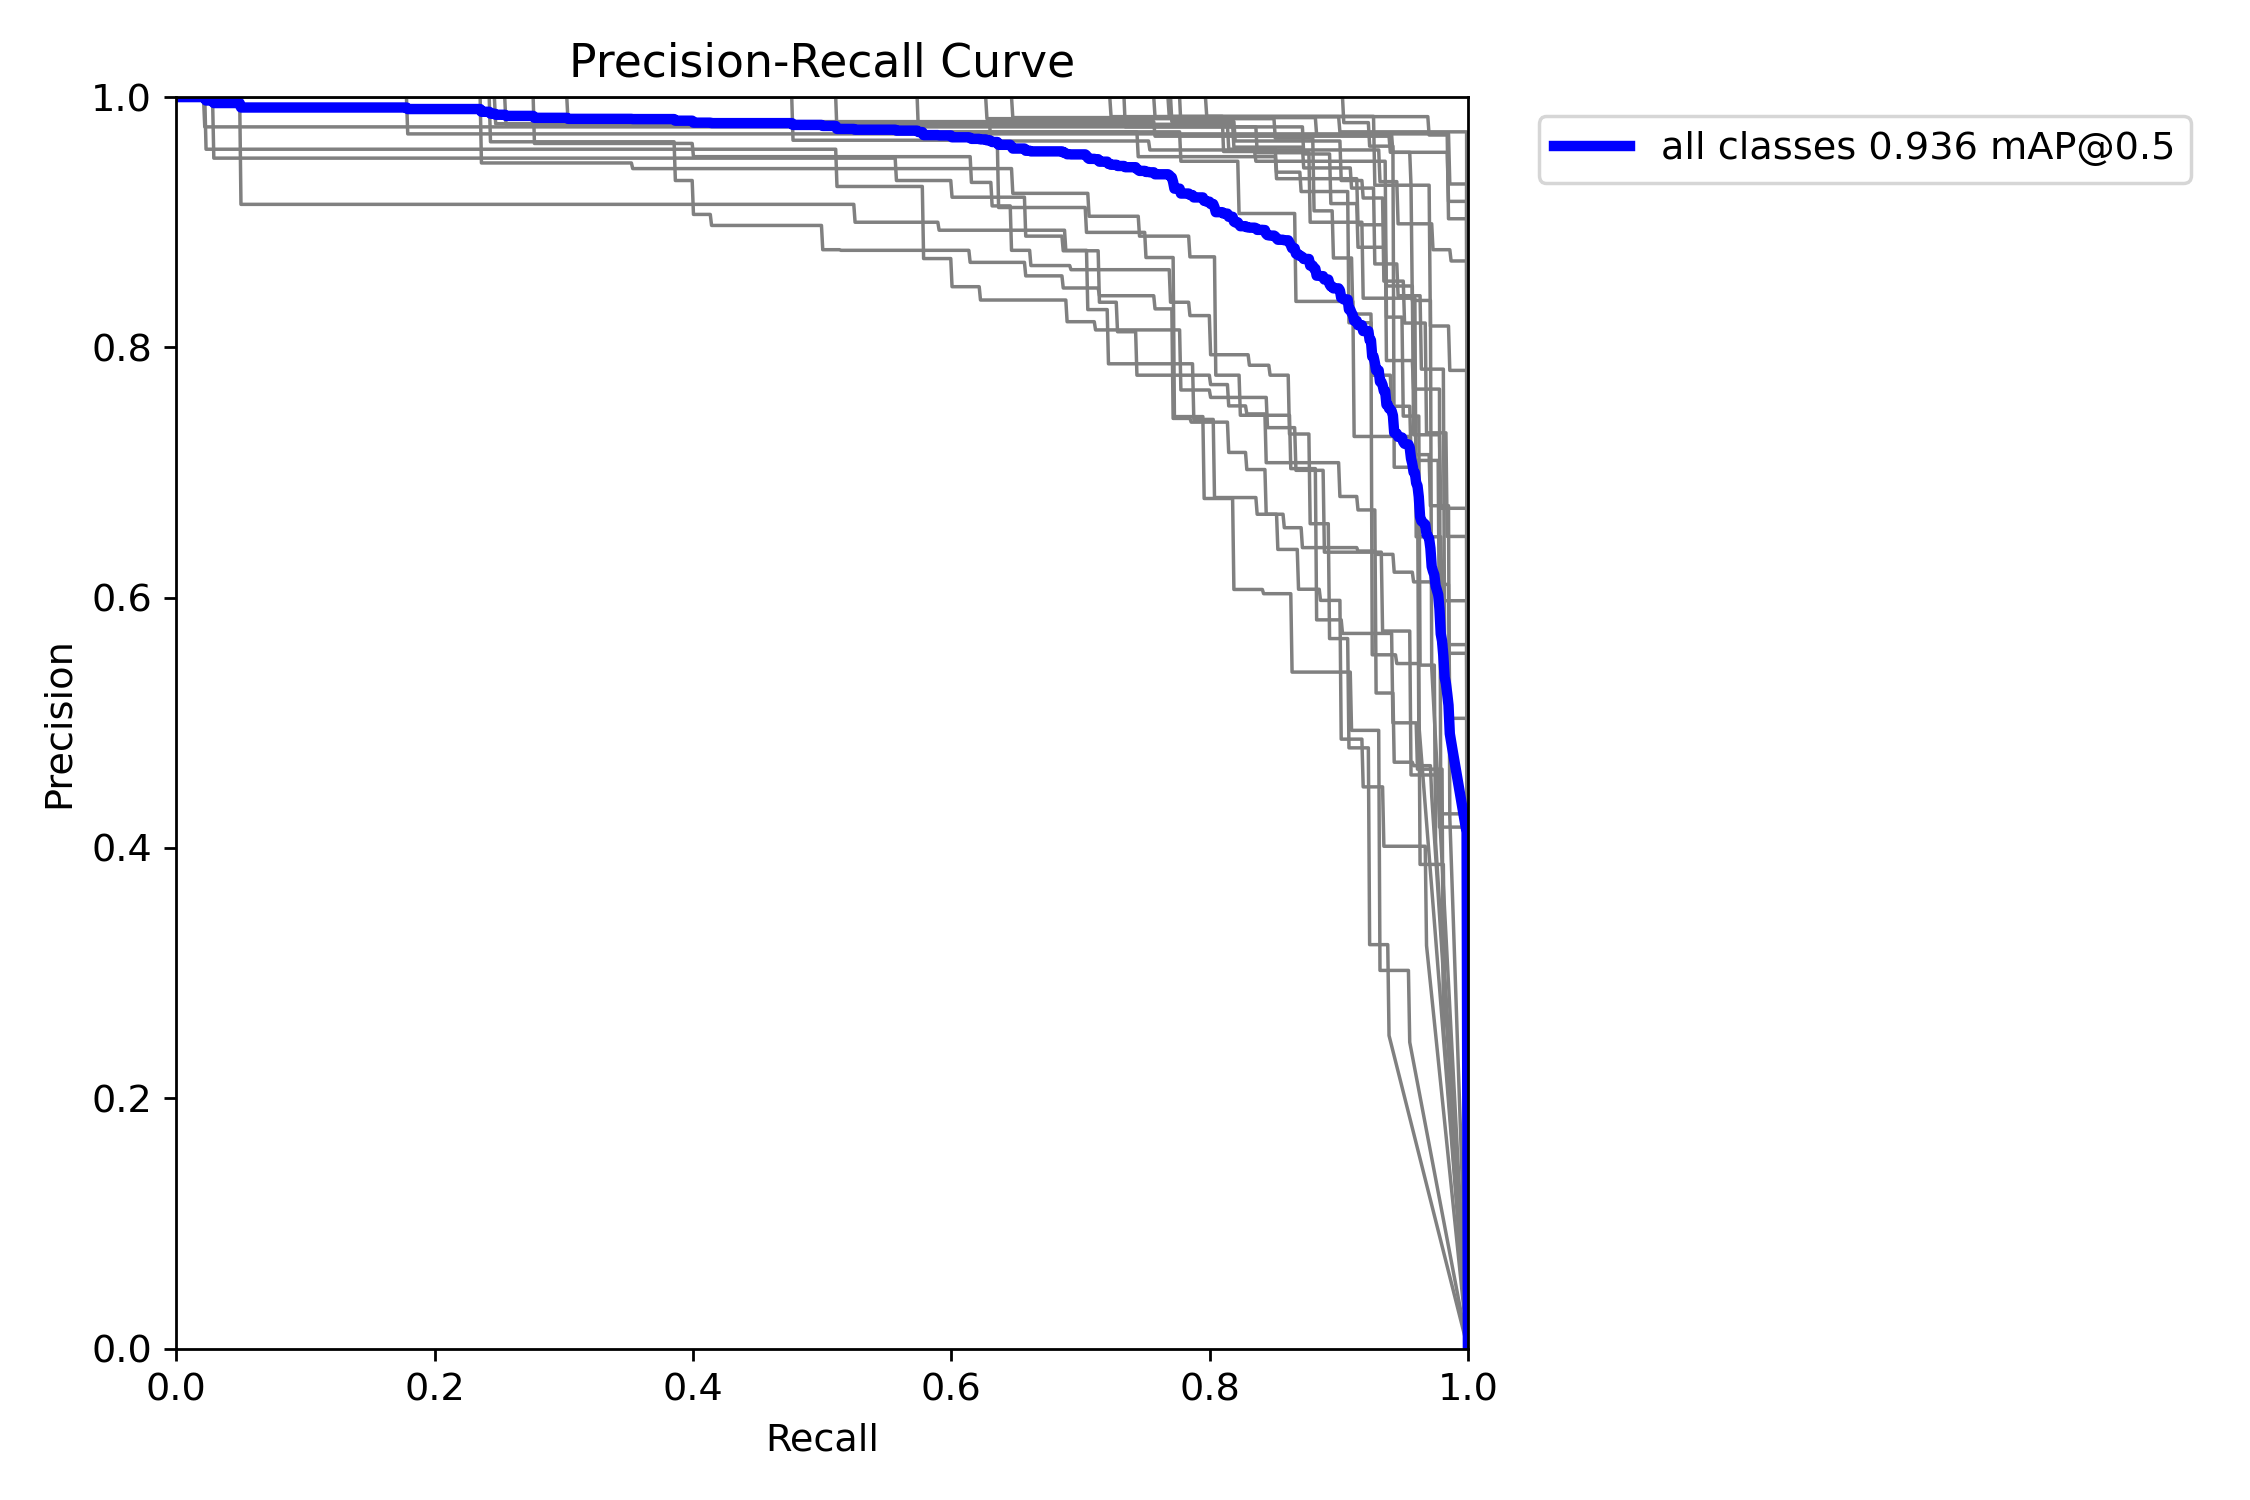

In [ ]:
# Графік залежності точності від повноти (Precision-Recall Curve)
IPyImage (filename = f'/content/runs/detect/train_result/PR_curve.png', width =600)

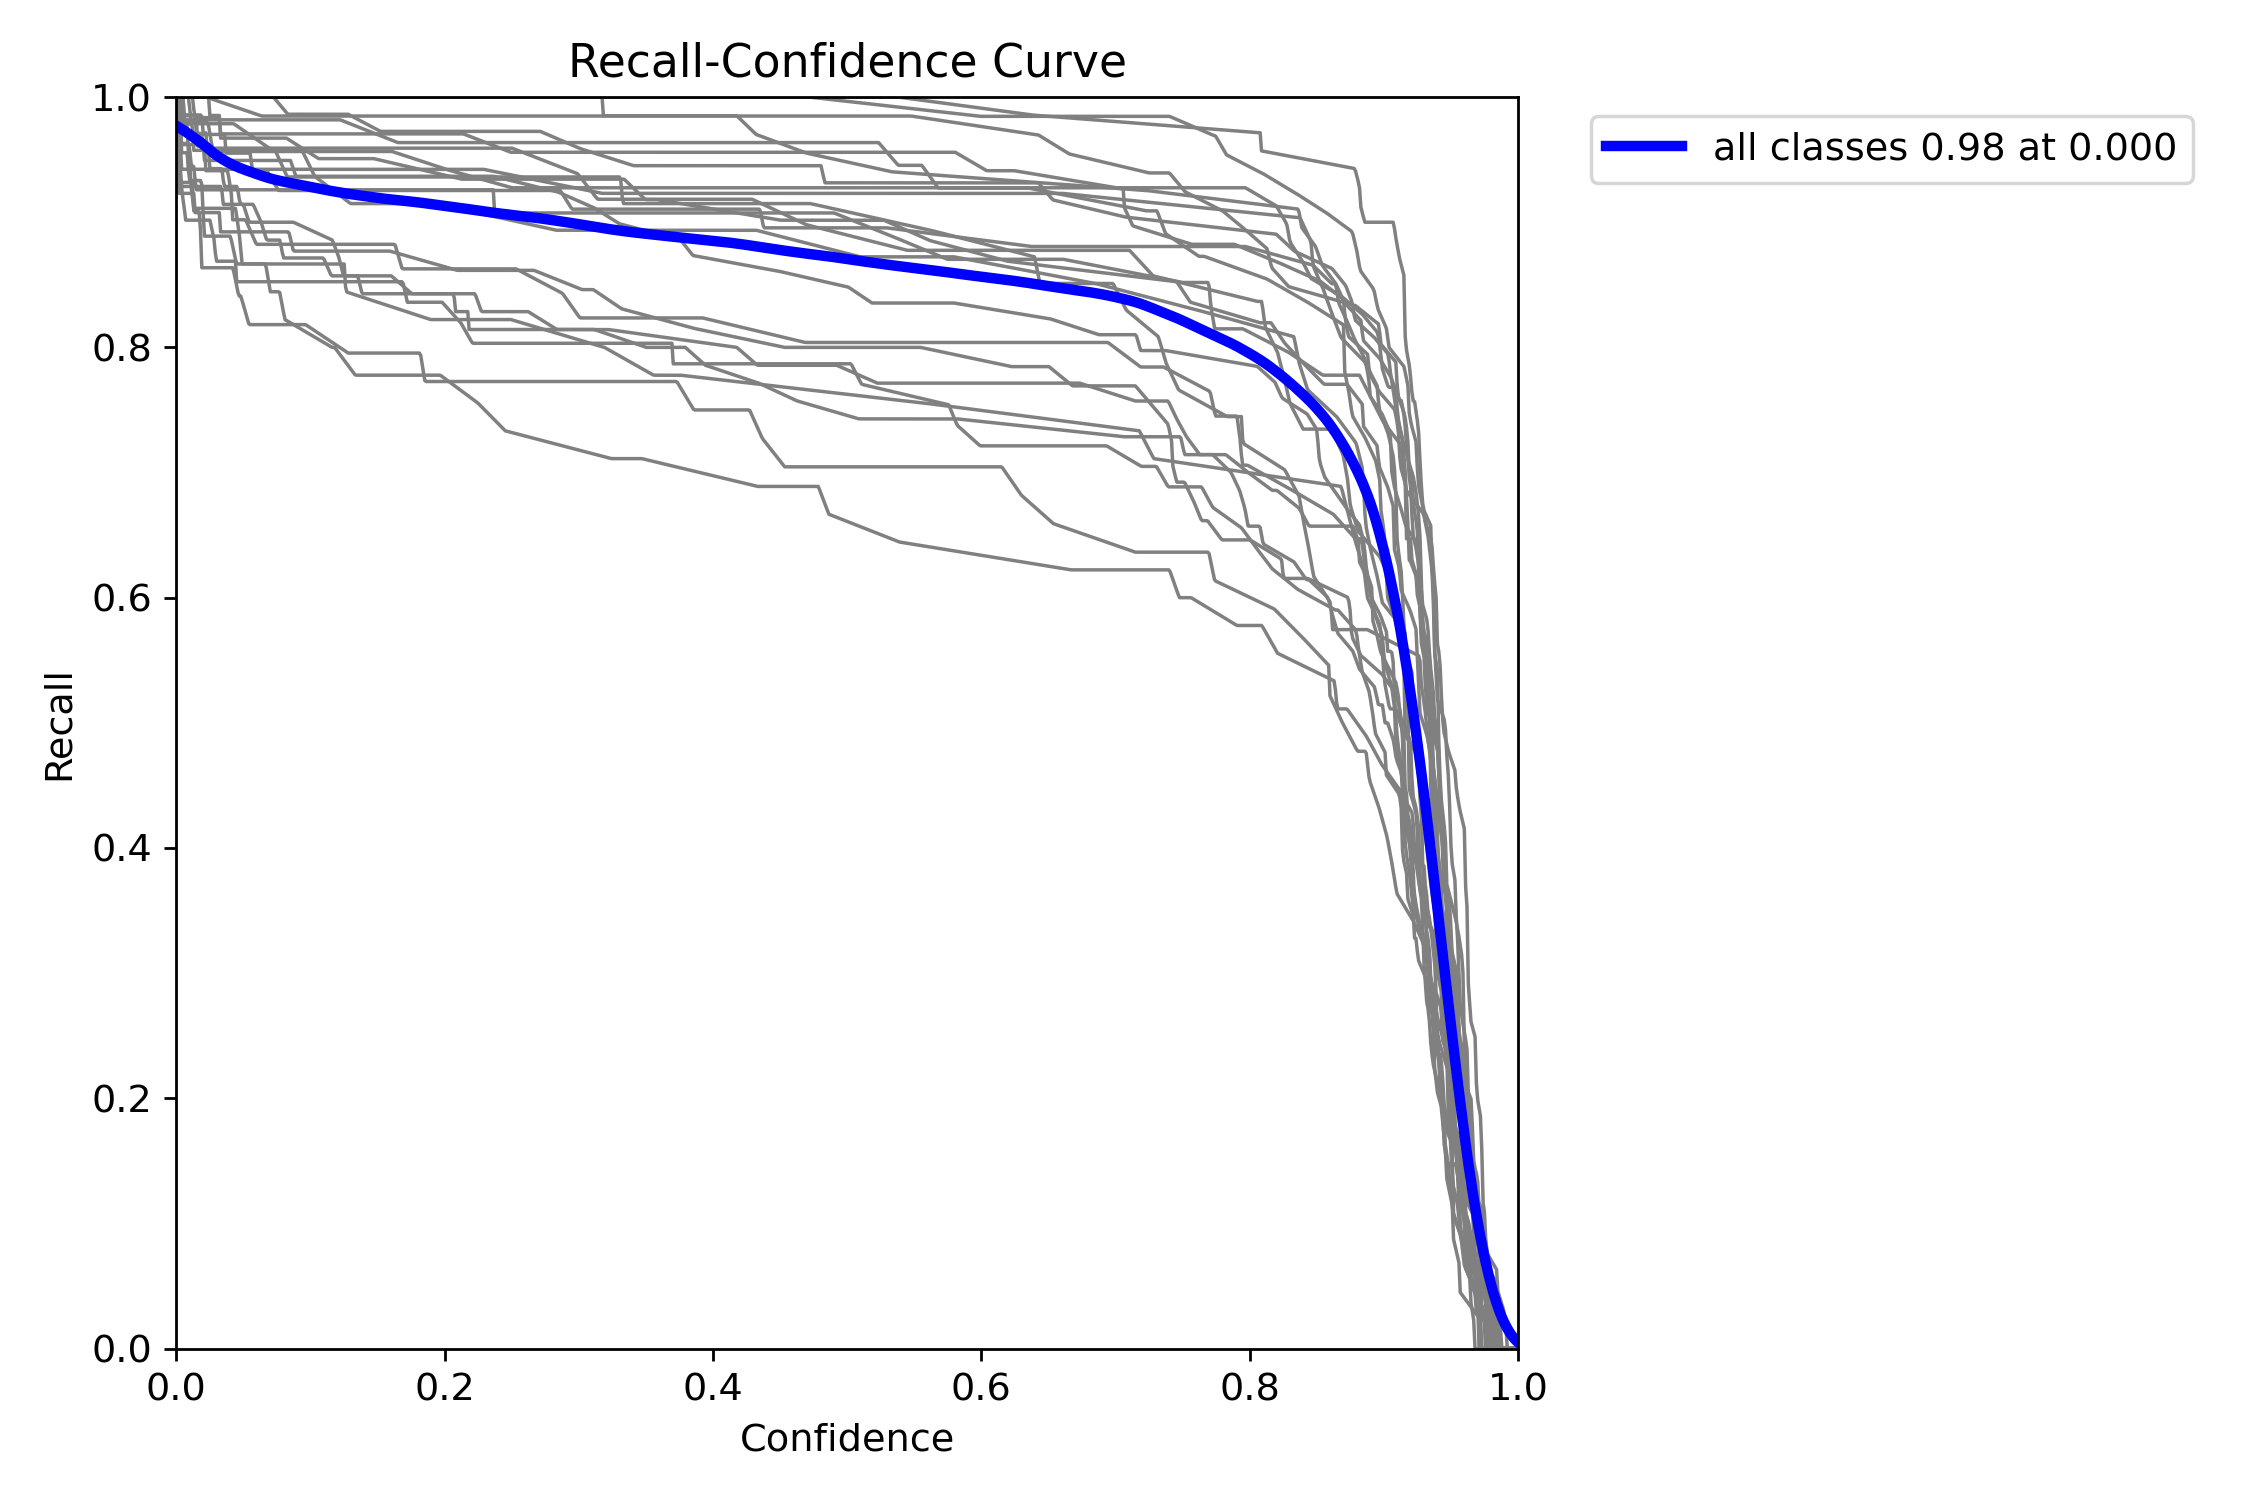

In [ ]:
# Графік залежності повноти від впевненості (Recall-Confidence Curve)
IPyImage (filename = f'/content/runs/detect/train_result/R_curve.png', width =600)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Вкажи шлях до вихідної папки
source_folder = "/content/runs"

# Вкажи шлях до папки на Google Drive
destination_folder = "/content/drive/MyDrive/ITVR_Coursework/yolo11m (50 epochs, 16 im batch)"

# Копіюємо папку, дозволяючи перезаписувати існуючі файли
shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)

print("Папку успішно скопійовано!")

Папку успішно скопійовано!


In [ ]:
import shutil
from google.colab import files

# Вкажи шлях до папки, яку потрібно завантажити
folder_path = "/content/runs"

# Стиснемо папку у формат ZIP
shutil.make_archive("yolo11m (50 epochs, 16 im batch)", "zip", folder_path)

# Завантажимо архів
files.download("yolo11m (50 epochs, 16 im batch).zip")